In [4]:
import numpy as np
import pandas as pd


file = pd.read_csv('data2.csv', delimiter=';', header=None)

esseys_list  = [] 
esseys_dict  = {} 
for i, el in enumerate(file[0]):
    el = el.replace("\n", " ")
    esseys_list.append(el)
    esseys_dict[i] = el
    


In [5]:
esseys_list

['В предложенном для анализа тексте В.А. Солоухин поднимает проблему родительского самопожертвования. Рассуждая над проблемой, автор приводит два взаимодополняющих примера. Так, например, самка выхухоли пытается спасти своих детенышей, утопающих в крошечной ямке с дождевой водой. Солоухин подчеркивает, что, несмотря на близкое присутствие человека, пугливая выхухоль не оставляет своих детенышей, а, рискуя своей жизнью, старается спасти их. Далее автор примеряет ситуацию на себя и рассуждает о родительском героизме во время войны. Писатель говорит о том, что если случится такое страшное событие как война, то и он будет из последних сил стараться спасти своих детей. Это говорит о том, что любой родитель будет готов пожертвовать своей жизнью, если почувствует, что детенышам грозит опасность. Авторская позиция такова: родительское самопожертвование- удивительное явление, присущее всем живым существам. С мнением автора невозможно не согласиться. Действительно, и в реальной жизни можно встре

In [6]:
from pprint import pprint

pprint(esseys_dict)

{0: 'В предложенном для анализа тексте В.А. Солоухин поднимает проблему '
    'родительского самопожертвования. Рассуждая над проблемой, автор приводит '
    'два взаимодополняющих примера. Так, например, самка выхухоли пытается '
    'спасти своих детенышей, утопающих в крошечной ямке с дождевой водой. '
    'Солоухин подчеркивает, что, несмотря на близкое присутствие человека, '
    'пугливая выхухоль не оставляет своих детенышей, а, рискуя своей жизнью, '
    'старается спасти их. Далее автор примеряет ситуацию на себя и рассуждает '
    'о родительском героизме во время войны. Писатель говорит о том, что если '
    'случится такое страшное событие как война, то и он будет из последних сил '
    'стараться спасти своих детей. Это говорит о том, что любой родитель будет '
    'готов пожертвовать своей жизнью, если почувствует, что детенышам грозит '
    'опасность. Авторская позиция такова: родительское самопожертвование- '
    'удивительное явление, присущее всем живым существам. С 

In [7]:
len(esseys_dict)

50

## Модуль для проверки цитирования

In [9]:
original_text = pd.read_csv('text.csv', delimiter=';', header=None)
text_list  = [] 
text_dict  = {} 
for i, n in enumerate(original_text[0]):
    n = n.replace("\n", " ")
    text_list.append(n)
    text_dict[i] = n

essay 0 does not include any quote
essay 1 include 1 quote
essay 2 include several quotes
essay 3 include several quotes
essay 4 include 1 quote
essay 5 does not include any quote
essay 6 does not include any quote
essay 7 include 1 quote
essay 8 include 1 quote
essay 9 does not include any quote
essay 10 include several quotes
essay 11 does not include any quote
essay 12 does not include any quote
essay 13 include several quotes
essay 14 does not include any quote
essay 15 include 1 quote
essay 16 include several quotes
essay 17 does not include any quote
essay 18 does not include any quote
essay 19 include 1 quote
essay 20 include several quotes
essay 21 include several quotes
essay 22 include several quotes
essay 23 include several quotes
essay 24 include several quotes
essay 25 does not include any quote
essay 26 include several quotes
essay 27 include 1 quote
essay 28 does not include any quote
essay 29 does not include any quote
essay 30 does not include any quote
essay 31 does n

(-1.109697898671973,
 1.1004618046986654,
 -1.1072647960957411,
 1.1072647823238335)

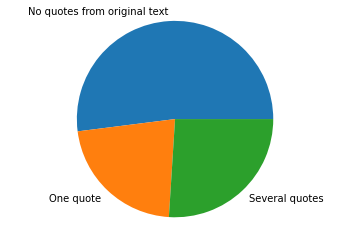

In [10]:
import re
import matplotlib.pyplot as plt

dict_quotes={'zero_quotes':0, 'one_quote': 0, 'several_quotes':0}
for i in range(len(esseys_dict)): 
    quotes = re.findall(r'«([^\«]*)»',esseys_dict[i]) 
    matches_with_text = 0 
    for quote in quotes: 
        if text_dict[0].find(quote) != -1: 
            matches_with_text += 1 
    if matches_with_text == 1: 
        dict_quotes['one_quote']+=1
        print('essay '+str(i)+' include 1 quote') 
    elif matches_with_text > 1:
        dict_quotes['several_quotes']+=1
        print('essay '+str(i)+' include several quotes')
    else: 
        print('essay '+str(i)+' does not include any quote') 
        dict_quotes['zero_quotes']+=1
values = [dict_quotes['zero_quotes'],dict_quotes['one_quote'],dict_quotes['several_quotes']] 
labels = ["No quotes from original text", "One quote", "Several quotes"]
fig, ax = plt.subplots() 
ax.pie(values, labels=labels) 
ax.axis("equal")

In [11]:
min_words = 150
for i in range(len(esseys_dict)): 
    words = len(esseys_dict[i].split()) 
    if words > min_words: 
        print('ok') 
    else: 
        print('Essay '+str(i)+' - Insufficient number of words')

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Essay 13 - Insufficient number of words
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Essay 40 - Insufficient number of words
ok
ok
ok
ok
ok
ok
ok
Essay 48 - Insufficient number of words
ok


## Модуль по подсчету ошибок в каждом сочинении

In [12]:
import copy
from pyaspeller import YandexSpeller
from pprint import pprint

esseys_list_2 = copy.deepcopy(esseys_list)

speller = YandexSpeller()
# text = ['Мы вчера подписали дАгАвор',
#         'пайдем гулять',
#         'кросива жить ни запретишь'
#        ]
changes = {}
dict_errors = dict()
for i, article in enumerate(esseys_list_2):
#     print(i, ':', article)
    changes[i] = {change['word']: change['s'][0] for change in speller.spell(article)}

for number, faults in changes.items():
    dict_errors[number] = len(faults)
    print('''Сочинение {0}:
    Ошибки: {1}
    Всего допущено ошибок: {2}'''.format(number+1, faults, len(faults)) )
    pprint(faults)
    print(len(faults))
#     print("---------")
    for word, suggestion in changes[number].items():
        esseys_list_2[number] = esseys_list_2[number].replace(word, suggestion)
#         print(number)
#         print(word, ':', suggestion)
#         print("---------")


# for text in art: 
#     changes = {change['word']: change['s'][0] for change in speller.spell(text)}
# for word, suggestion in changes.items():
#     for i, el in enumerate(art):
#         el = el.replace(word, suggestion)
#         art[i] = el
# art


# Это чисто для понимания, как это работает
# from pprint import pprint
# text2 = 'Мы вчера подписали дАгАвор'
# for change in speller.spell(text2):
#     pprint(change)

Сочинение 1:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 2:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 3:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 4:
    Ошибки: {'всеобъемлюща': 'всеобъемлющая'}
    Всего допущено ошибок: 1
{'всеобъемлюща': 'всеобъемлющая'}
1
Сочинение 5:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 6:
    Ошибки: {'так же': 'также'}
    Всего допущено ошибок: 1
{'так же': 'также'}
1
Сочинение 7:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 8:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 9:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 10:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 11:
    Ошибки: {'ставит': 'ставить', 'не взирая': 'невзирая', 'не смотря': 'несмотря'}
    Всего допущено ошибок: 3
{'не взирая': 'невзирая', 'не смотря': 'несмотря', 'ставит': 'ставить'}
3
Сочинение 12:
    Ошибки: {}
    Всего допущено ошибок: 0
{}
0
Сочинение 13:
    О

In [13]:
dict_errors

df = pd.DataFrame.from_dict(dict_errors, orient='index').rename(columns={0:'Count_of_mistakes'})

df_2 = df[df.Count_of_mistakes > 0]

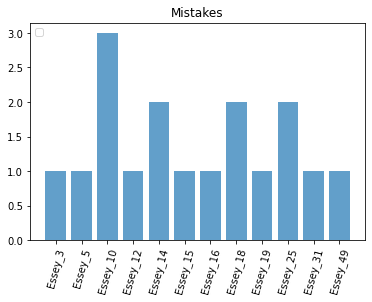

In [14]:
import matplotlib.pyplot as plt

index = [f'Essey_{i}' for i in df_2.index]
values = df_2.Count_of_mistakes
plt.title('Mistakes')

plt.bar(index, values, alpha=0.7)
plt.xticks(index, rotation = 75)
plt.legend(loc=2)
plt.show()

In [15]:
df_2.index

Int64Index([3, 5, 10, 12, 14, 15, 16, 18, 19, 25, 31, 49], dtype='int64')

## Лемматизация

In [16]:
import pymorphy2
import pymystem3

m1 = pymorphy2.MorphAnalyzer()
m2 = pymystem3.Mystem()

In [17]:
def custom_lemmatize(dataset):
    for i, text in enumerate(dataset):
#         print(text)
        text_2 = text.split(' ')
        text_2 = m2.lemmatize(text)
        text_3 = ''.join(text_2)

#         print(text_2)
#         print(text_3)

#         print("Lets give it into dataset back:")

        dataset[i] = text_3
        dataset[i] = dataset[i].replace("\n", "")
#     print(dataset)
    return dataset

esseys_list_3 = copy.deepcopy(esseys_list_2)

esseys_list_3 = custom_lemmatize(esseys_list_3)

esseys_list_3
        

['в предлагать для анализ текст в.а. солоухин подымать проблема родительский самопожертвование. рассуждать над проблема, автор приводить два взаимодополняющий пример. так, например, самка выхухоль пытаться спасать свой детеныш, утопать в крошечный ямка с дождевой вода. солоухин подчеркивать, что, несмотря на близкий присутствие человек, пугливый выхухоль не оставлять свой детеныш, а, рисковать свой жизнь, стараться спасать они. далее автор примеривать ситуация на себя и рассуждать о родительский героизм во время война. писатель говорить о то, что если случаться такой страшный событие как война, то и он быть из последний сила стараться спасать свой ребенок. это говорить о то, что любой родитель быть готовый пожертвовать свой жизнь, если почувствовать, что детеныш грозить опасность. авторский позиция таков: родительский самопожертвование- удивительный явление, присущий весь живой существо. с мнение автор невозможно не соглашаться. действительно, и в реальный жизнь можно встречать пример 

In [18]:
key_words = pd.read_csv('Keywords.csv', delimiter=';', header=None)

keywords_list  = [] 
for i, el in enumerate(key_words[0]):
    el = el.replace("\n", " ")
    keywords_list.append(el)

In [19]:
keywords_list

['Выхухоль',
 'Солоухин',
 'писатель ',
 'поэт',
 'Детёныши',
 'Проблема',
 'Вопрос',
 'Позиция',
 'Любовь',
 'Вопрос',
 'Мать',
 'Доказать',
 'Спасти',
 'Защитить',
 'Самопожертвование',
 'Паводок',
 'Вывод',
 'Автор',
 'Героизм',
 'Мнение']

In [20]:
keywords_list = custom_lemmatize(keywords_list)
keywords_list

['выхухоль',
 'солоухин',
 'писатель ',
 'поэт',
 'детеныш',
 'проблема',
 'вопрос',
 'позиция',
 'любовь',
 'вопрос',
 'мать',
 'доказывать',
 'спасать',
 'защищать',
 'самопожертвование',
 'паводок',
 'вывод',
 'автор',
 'героизм',
 'мнение']

### Наличие ключевых слов в тексте

In [21]:
key_precence = dict()

for i, article in enumerate(esseys_list_3):
    key_precence[i] = {key_word: 0 for key_word in keywords_list}
    key_precence[i]['total_matches'] = 0
    total = 0
    for word in keywords_list:
        local_count = 0
        if word in article:
            key_precence[i][word] += 1
            key_precence[i]["total_matches"] += 1
            
pprint(key_precence)
            

{0: {'total_matches': 14,
     'автор': 1,
     'вопрос': 0,
     'вывод': 1,
     'выхухоль': 1,
     'героизм': 1,
     'детеныш': 1,
     'доказывать': 0,
     'защищать': 1,
     'любовь': 0,
     'мать': 1,
     'мнение': 1,
     'паводок': 0,
     'писатель ': 1,
     'позиция': 1,
     'поэт': 0,
     'проблема': 1,
     'самопожертвование': 1,
     'солоухин': 1,
     'спасать': 1},
 1: {'total_matches': 14,
     'автор': 1,
     'вопрос': 2,
     'вывод': 0,
     'выхухоль': 1,
     'героизм': 1,
     'детеныш': 1,
     'доказывать': 0,
     'защищать': 1,
     'любовь': 1,
     'мать': 1,
     'мнение': 0,
     'паводок': 1,
     'писатель ': 0,
     'позиция': 1,
     'поэт': 0,
     'проблема': 1,
     'самопожертвование': 1,
     'солоухин': 1,
     'спасать': 0},
 2: {'total_matches': 15,
     'автор': 1,
     'вопрос': 2,
     'вывод': 1,
     'выхухоль': 1,
     'героизм': 1,
     'детеныш': 1,
     'доказывать': 0,
     'защищать': 0,
     'любовь': 0,
     'мать': 1,


In [22]:
key_analysis = dict()

for key, value in key_precence.items():
    key_analysis['Essey_{0}'.format(key)] = value['total_matches']

In [23]:
key_analysis

{'Essey_0': 14,
 'Essey_1': 14,
 'Essey_2': 15,
 'Essey_3': 13,
 'Essey_4': 14,
 'Essey_5': 14,
 'Essey_6': 16,
 'Essey_7': 15,
 'Essey_8': 11,
 'Essey_9': 14,
 'Essey_10': 12,
 'Essey_11': 17,
 'Essey_12': 11,
 'Essey_13': 11,
 'Essey_14': 15,
 'Essey_15': 13,
 'Essey_16': 15,
 'Essey_17': 14,
 'Essey_18': 12,
 'Essey_19': 14,
 'Essey_20': 12,
 'Essey_21': 12,
 'Essey_22': 12,
 'Essey_23': 12,
 'Essey_24': 12,
 'Essey_25': 11,
 'Essey_26': 15,
 'Essey_27': 12,
 'Essey_28': 15,
 'Essey_29': 15,
 'Essey_30': 15,
 'Essey_31': 11,
 'Essey_32': 15,
 'Essey_33': 13,
 'Essey_34': 13,
 'Essey_35': 14,
 'Essey_36': 14,
 'Essey_37': 13,
 'Essey_38': 13,
 'Essey_39': 13,
 'Essey_40': 7,
 'Essey_41': 14,
 'Essey_42': 11,
 'Essey_43': 16,
 'Essey_44': 13,
 'Essey_45': 11,
 'Essey_46': 11,
 'Essey_47': 14,
 'Essey_48': 8,
 'Essey_49': 11}

In [24]:
df_keys = pd.DataFrame.from_dict(key_analysis, orient='index').rename(columns={0:'Key_words'})

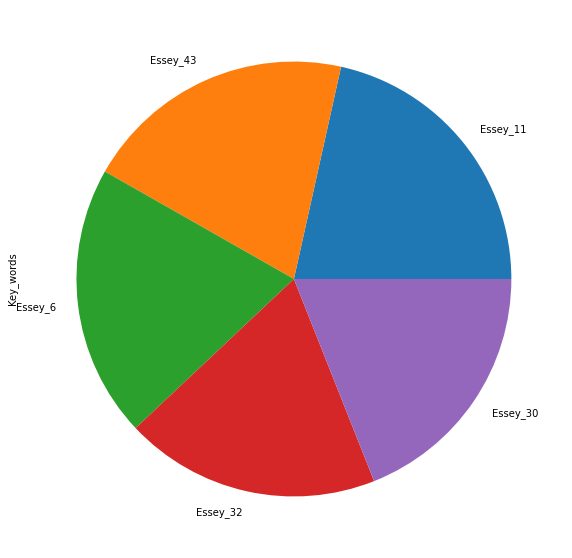

In [26]:
top_five = df_keys.sort_values(by='Key_words', ascending=False)[:5]

top_five['Key_words'].plot(kind='pie', figsize=(10,10))
plt.show()

In [27]:
!pip install deep_translator

In [28]:
import spacy_udpipe

spacy_udpipe.download("ru") # download English model

translate_pos ={'ADJ': 'имя прилагательное',
             'ADP': 'сближение',
             'ADV': 'наречие',
             'AUX': 'вспомогательный глагол',
             'CCONJ': 'координирующее соединение',
             'DET': 'определитель',
             'NOUN': 'существительное',
             'NUM': 'цифра',
             'PART': 'частица',
             'PRON': 'местоимение',
             'PUNCT': 'знак препинания',
             'SCONJ': 'подчинительный союз',
             'VERB': 'глагол',
             'PROPN': 'имя собственное',
             'INTJ': 'междометие',
             'X': 'другое'
               }
# article = [
#            ["Мы напишем самую хорошую программу, которая будет парсить все тексты на свете!"],
#            ["Другое сочинение, которое нам пока не так интересно!"]
# ]
# text = "Мы напишем самую хорошую программу, которая будет парсить все тексты на свете!"
nlp = spacy_udpipe.load("ru")
faults = {}
for  i, el in enumerate(esseys_list_3):
    doc = nlp(el)
    faults[i] = {}
    for token in doc:
        rus_pos = translate_pos[token.pos_]
        if rus_pos not in faults[i]:
            faults[i][rus_pos] = 1
        else:
            faults[i][rus_pos] += 1
#     print(token.text, token.lemma_, token.pos_, token.dep_)
#     print('---------------------------------------')

Already downloaded a model for the 'ru' language


In [29]:
for key, value in faults.items():
    print("Статистика по сочинению ", key, ":")
    pprint(value)
#     print("{0}: {1}".format(key,value))
    print('\n')

Статистика по сочинению  0 :
{'вспомогательный глагол': 2,
 'глагол': 32,
 'знак препинания': 38,
 'имя прилагательное': 24,
 'координирующее соединение': 5,
 'местоимение': 11,
 'наречие': 11,
 'определитель': 10,
 'подчинительный союз': 12,
 'сближение': 19,
 'существительное': 54,
 'цифра': 1,
 'частица': 6}


Статистика по сочинению  1 :
{'вспомогательный глагол': 5,
 'глагол': 39,
 'знак препинания': 51,
 'имя прилагательное': 17,
 'имя собственное': 1,
 'координирующее соединение': 12,
 'местоимение': 13,
 'наречие': 15,
 'определитель': 7,
 'подчинительный союз': 6,
 'сближение': 29,
 'существительное': 71,
 'цифра': 2,
 'частица': 10}


Статистика по сочинению  2 :
{'вспомогательный глагол': 6,
 'глагол': 54,
 'знак препинания': 63,
 'имя прилагательное': 22,
 'координирующее соединение': 11,
 'местоимение': 20,
 'наречие': 17,
 'определитель': 15,
 'подчинительный союз': 8,
 'сближение': 42,
 'существительное': 95,
 'цифра': 4,
 'частица': 8}


Статистика по сочинению  3 :
{'в

### Модуль для перевода на русский. 
### Переводчик работает очень долго, если  внедрять его в основной алгоритм, поэтому после работы функции сделал словарь с перекодировками, а потом вручную определил словарь, и изменил код выше.

In [30]:
import spacy

for key in faults[0].keys():
    print(key, ':', spacy.explain(key))


сближение : None
глагол : None
существительное : None
знак препинания : None
имя прилагательное : None
цифра : None
наречие : None
определитель : None
подчинительный союз : None
частица : None
координирующее соединение : None
местоимение : None
вспомогательный глагол : None


E:\anaconda444\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'сближение' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
E:\anaconda444\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'глагол' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
E:\anaconda444\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'существительное' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
E:\anaconda444\lib\site-packages\spacy\glossary.py:19: UserWa

In [31]:
from deep_translator import GoogleTranslator


translate_pos = dict()

for key in faults[0].keys():
    try:
        rus_pos = GoogleTranslator(source='en', target='ru').translate(spacy.explain(key))
        translate_pos[key] = rus_pos
    except:
        print("Все уже переведено!")
        break

pprint(translate_pos)


Все уже переведено!
{}


## Удаление стоп-слов

In [32]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('russian'))

len(stopWords)

151

In [33]:
from nltk.tokenize import word_tokenize
esseys_list_4 = []

for i, text in enumerate(esseys_list_3):
#     res =  word_tokenize(text)
    esseys_list_4.append([word for word in word_tokenize(text) if word not in stopWords])
    esseys_list_4[i] = ' '.join(esseys_list_4[i]) # Если хотим, чтобы всебыло одним текстом, как раньше, то так, если нет, то строчку модно удалить

print(esseys_list_3[1])

print(len(esseys_list_3))
print(len(esseys_list_4))

print(esseys_list_4[1])

как проявляться любовь мать к свой ребенок? над этот вопрос мы предлагать задумываться в. а. солоухин. размышлять над проблема, автор повествовать о паводок. из-за сильный, непрекращающийся дождь разливаться река. для человек это быть воистину прекрасный и завораживать зрелище, для небольшой зверек - настоящий катастрофа. детеныш выхухоль пытаться выбираться из лужа, образованный коровий копытце. мать, уносить сильный течение, спешить помогать детеныш, хоть и сам быть в бедственный положение. в. а. солоухин писать, что, встречаться глаз с рассказчик, выхухоль приближаться к человек на два метр, хотя это очень пугливый животное. «это быть героизм, это быть самопожертвование мать, но иначе не мочь и быть: ведь детеныш кричать так тревожно и так призывно!» она не мочь оставлять детеныш в беда, и так проявляться ее родительский любовь. автор, на пример животное, давать мы понимать, что материнский чувство проявляться в готовность отдавать жизнь за собственный ребенок. я полностью согласный

In [36]:
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

pyLDAvis.enable_notebook()

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                lowercase = True,
                                token_pattern = r'\b[а-яА-Я]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(esseys_list_4)
print(dtm_tf.shape)

(50, 123)


In [37]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(esseys_list_4)
print(dtm_tfidf.shape)

(50, 123)


E:\anaconda444\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [38]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [39]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

E:\anaconda444\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
E:\anaconda444\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.265202  0.225379       1        1  9.905087
9      0.060109 -0.050766       2        1  8.805406
6      0.092885  0.024183       3        1  8.650038
7      0.016580 -0.110816       4        1  8.613800
0     -0.052204 -0.128013       5        1  7.438286
14    -0.026236 -0.092360       6        1  7.218014
8      0.085843 -0.043637       7        1  7.114159
13     0.098095  0.039273       8        1  6.910502
15     0.031556 -0.074525       9        1  6.673725
19     0.002362  0.075758      10        1  6.313359
11     0.096025  0.148126      11        1  5.557700
3      0.141775  0.154733      12        1  4.542685
18    -0.079200  0.036508      13        1  3.619880
10     0.019422 -0.012604      14        1  2.377089
5     -0.038421 -0.017640      15        1  2.073999
16    -0.209720 -0.131208      16        1  2.014337
12     0.076103 -0.070654      17        1  1.864453
4     -0.016591  0.009422      18        1  0.102493
2     -0.016591  0.009422      19        1  0.102493
17    -0.016591  0.009422      20        1  0.102493, topic_info=            Term       Freq      Total Category  logprob  loglift
91       сильныи  32.000000  32.000000  Default  30.0000  30.0000
39   материнскии  56.000000  56.000000  Default  29.0000  29.0000
119      чувство  29.000000  29.000000  Default  28.0000  28.0000
35         любои  37.000000  37.000000  Default  27.0000  27.0000
77   проявляться  45.000000  45.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
107      считать   0.019874  18.963082  Topic20  -4.8122   0.0223
118     читатель   0.019874  25.746679  Topic20  -4.8122  -0.2835
121         ямка   0.019874  19.899247  Topic20  -4.8122  -0.0259
0     алексеевич   0.019874  18.114155  Topic20  -4.8122   0.0681
1           беда   0.019874  24.841751  Topic20  -4.8122  -0.2478

[807 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         2  0.331233  алексеевич
0         3  0.055205  алексеевич
0         8  0.220822  алексеевич
0        11  0.220822  алексеевич
0        14  0.110411  алексеевич
...     ...       ...         ...
122       2  0.095591       ясныи
122       4  0.095591       ясныи
122       5  0.477957       ясныи
122       9  0.191183       ясныи
122      15  0.095591       ясныи

[803 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 7, 8, 1, 15, 9, 14, 16, 20, 12, 4, 19, 11, 6, 17, 13, 5, 3, 18])